In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
credit_data = pd.read_csv('Downloads/credit.csv')
#display the observations
credit_data

ID  Customer_ID  Month           Name   Age          SSN  \
0        5634         3392      1  Aaron Maashoh  23.0  821000265.0   
1        5635         3392      2  Aaron Maashoh  23.0  821000265.0   
2        5636         3392      3  Aaron Maashoh  23.0  821000265.0   
3        5637         3392      4  Aaron Maashoh  23.0  821000265.0   
4        5638         3392      5  Aaron Maashoh  23.0  821000265.0   
...       ...          ...    ...            ...   ...          ...   
99995  155625        37932      4          Nicks  25.0   78735990.0   
99996  155626        37932      5          Nicks  25.0   78735990.0   
99997  155627        37932      6          Nicks  25.0   78735990.0   
99998  155628        37932      7          Nicks  25.0   78735990.0   
99999  155629        37932      8          Nicks  25.0   78735990.0   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                3.0   
1      Scientist       19114.12            1824.843333                3.0   
2      Scientist       19114.12            1824.843333                3.0   
3      Scientist       19114.12            1824.843333                3.0   
4      Scientist       19114.12            1824.843333                3.0   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                4.0   
99996   Mechanic       39628.99            3359.415833                4.0   
99997   Mechanic       39628.99            3359.415833                4.0   
99998   Mechanic       39628.99            3359.415833                4.0   
99999   Mechanic       39628.99            3359.415833                4.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                  265.0                     No            49.574949   
1                  266.0                     No            49.574949   
2                  267.0                     No            49.574949   
3                  268.0                     No            49.574949   
4                  269.0                     No            49.574949   
...                  ...                    ...                  ...   
99995              378.0                     No            35.104023   
99996              379.0                     No            35.104023   
99997              380.0                     No            35.104023   
99998              381.0                     No            35.104023   
99999              382.0                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    21.465380   High_spent_Small_value_payments   
1                    21.465380    Low_spent_Large_value_payments   
2                    21.465380   Low_spent_Medium_value_payments   
3                    21.465380    Low_spent_Small_value_payments   
4                    21.465380  High_spent_Medium_value_payments   
...                        ...                               ...   
99995                24.028477   High_spent_Large_v

In [3]:
credit_data.shape

(100000, 28)

In [4]:
credit_data.describe()

ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417           0.000000   
25%    2.451686e+08   19342.972500            1626.594167           3.000000   
50%    5.006886e+08   36999.705000            3095.905000           5.000000   
75%    7.560027e+08   71683.470000            5957.715000           7.000000   
max    9.999934e+08  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate  ...  Delay_from_due_date  \
count    100000.000000   100000.00000  ...         100000.00000   
mean          5.533570       14.53208  ...             21.08141   
std           2.067098        8.74133  ...             14.80456   
min           0.000000        1.00000  ...              0.00000   
25%           4.000000        7.00000  ...             10.00000   
50%           5.000000       13.00000  ...             18.00000   
75%           7.000000       20.00000  ...             28.00000   
max          11.000000       34.00000  ...             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1426.220376                 32.285173          221.220460   
std         1155.129026                  5.116875           99.680716   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000            100000.000000    100000.000000  
mean            107.699208                55.101315       392.697586  
std             132.267056                39.006932       201.652719  
min               0.000000                 0.000000         0.007760  
25%              29.268886                27.959111       267.615983  
50%              66.462304                45.156550       333.865366  
75%             147.392573                71.295797       463.215683  
max            1779.103254               434.191089      1183.930696  

[8 rows x 21 columns]

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
#checking the null values
credit_data.isnull().sum().reset_index().rename(columns={'index':'feature_name',0:'null_counts'})

feature_name  null_counts
0                         ID            0
1                Customer_ID            0
2                      Month            0
3                       Name            0
4                        Age            0
5                        SSN            0
6                 Occupation            0
7              Annual_Income            0
8      Monthly_Inhand_Salary            0
9          Num_Bank_Accounts            0
10           Num_Credit_Card            0
11             Interest_Rate            0
12               Num_of_Loan            0
13              Type_of_Loan            0
14       Delay_from_due_date            0
15    Num_of_Delayed_Payment            0
16      Changed_Credit_Limit            0
17      Num_Credit_Inquiries            0
18                Credit_Mix            0
19          Outstanding_Debt            0
20  Credit_Utilization_Ratio            0
21        Credit_History_Age            0
22     Payment_of_Min_Amount            0
23       Total_EMI_per_month            0
24   Amount_invested_monthly            0
25         Payment_Behaviour            0
26           Monthly_Balance            0
27              Credit_Score            0

In [7]:
#to find the duplicated rows
credit_data.duplicated().sum()

0

In [8]:
credit_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
credit_data.drop(['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age'],axis=1,inplace=True)

# EDA

In [10]:
#arranging numerical and categorical columns
credit_cal=credit_data.select_dtypes(include='object')
credit_num=credit_data.select_dtypes(include='number')

In [11]:
credit_cal.describe().T

count unique                             top   freq
Occupation             100000     15                          Lawyer   7096
Credit_Mix             100000      3                        Standard  45848
Payment_of_Min_Amount  100000      3                             Yes  52326
Payment_Behaviour      100000      6  Low_spent_Small_value_payments  28616
Credit_Score           100000      3                        Standard  53174

In [12]:
for cat_col in credit_cal:
    print(credit_cal[cat_col].value_counts())
    print('\n-------------')

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

-------------
Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

-------------
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

-------------
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

-------------
Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

-------------


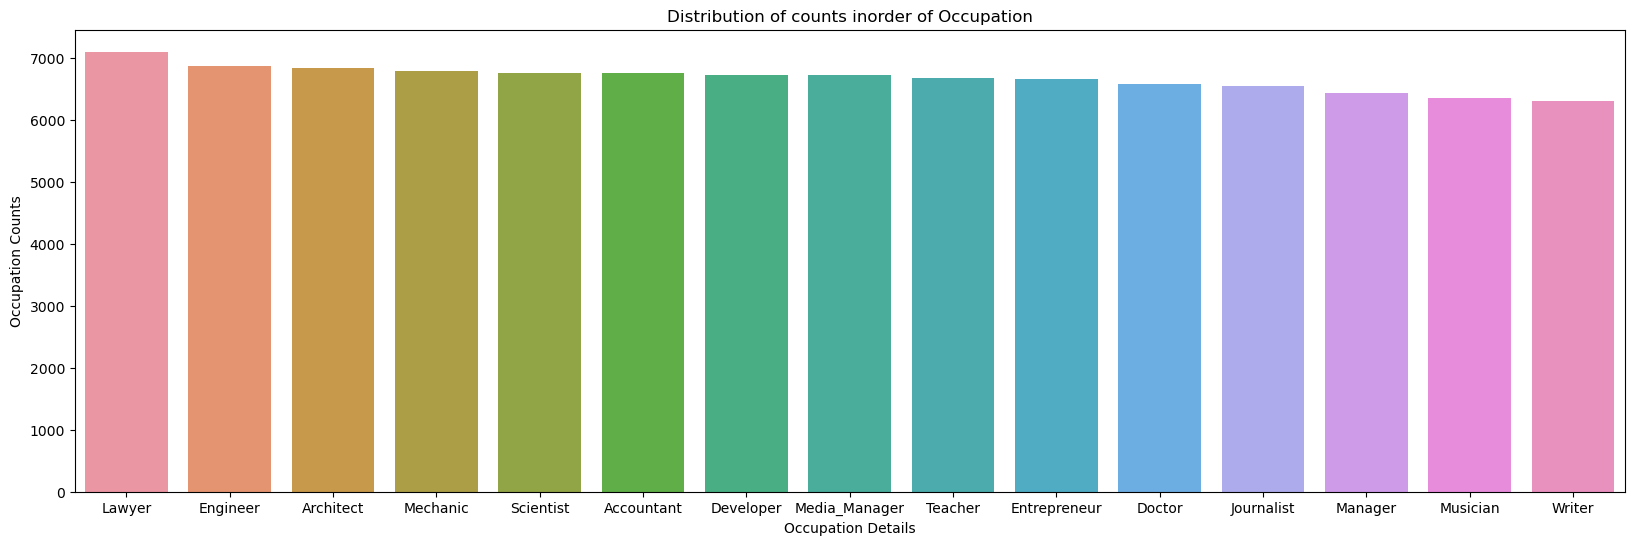

In [13]:
#occupation
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Occupation',data=credit_cal,order=credit_data['Occupation'].value_counts().index)
plt.title('Distribution of counts inorder of Occupation')
plt.xlabel('Occupation Details')
plt.ylabel("Occupation Counts")
plt.show()

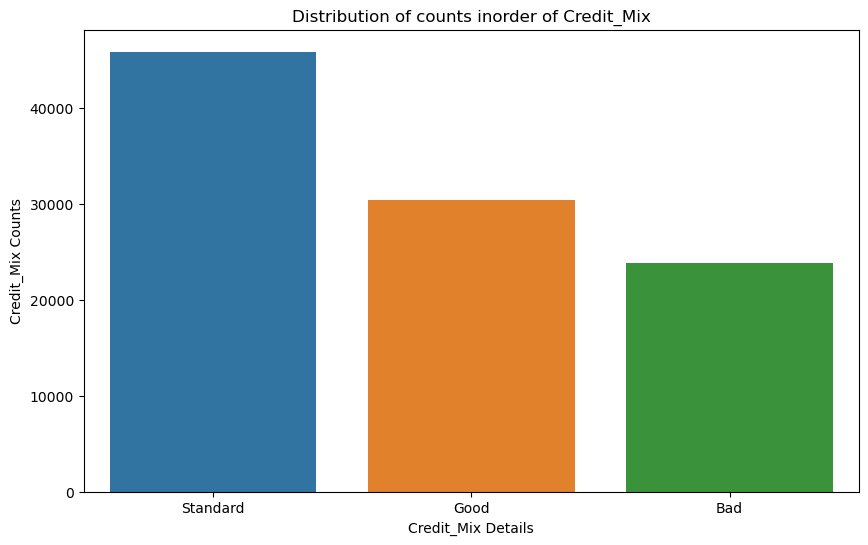

In [14]:
#credit mix
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Credit_Mix',data=credit_cal,order=credit_data['Credit_Mix'].value_counts().index)
plt.title('Distribution of counts inorder of Credit_Mix')
plt.xlabel('Credit_Mix Details')
plt.ylabel("Credit_Mix Counts")
plt.show()

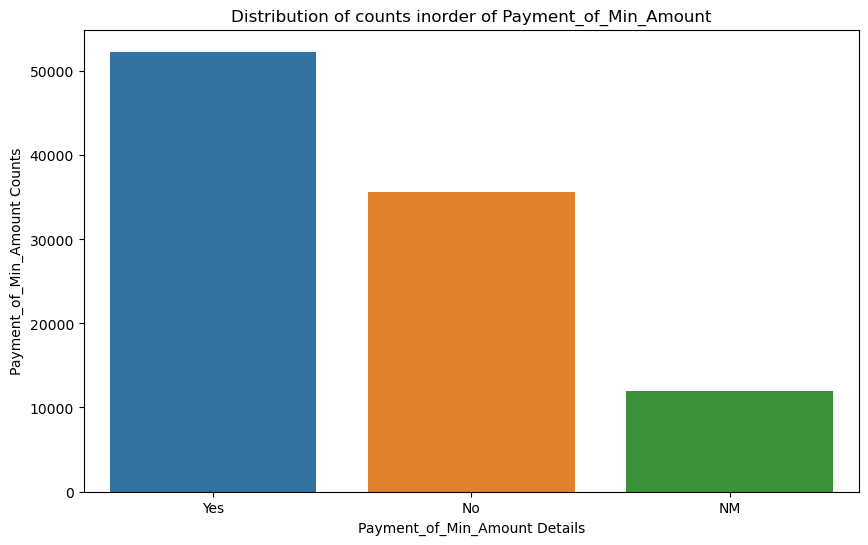

In [15]:
#Payment_of_Min_Amount
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Payment_of_Min_Amount',data=credit_cal,order=credit_data['Payment_of_Min_Amount'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

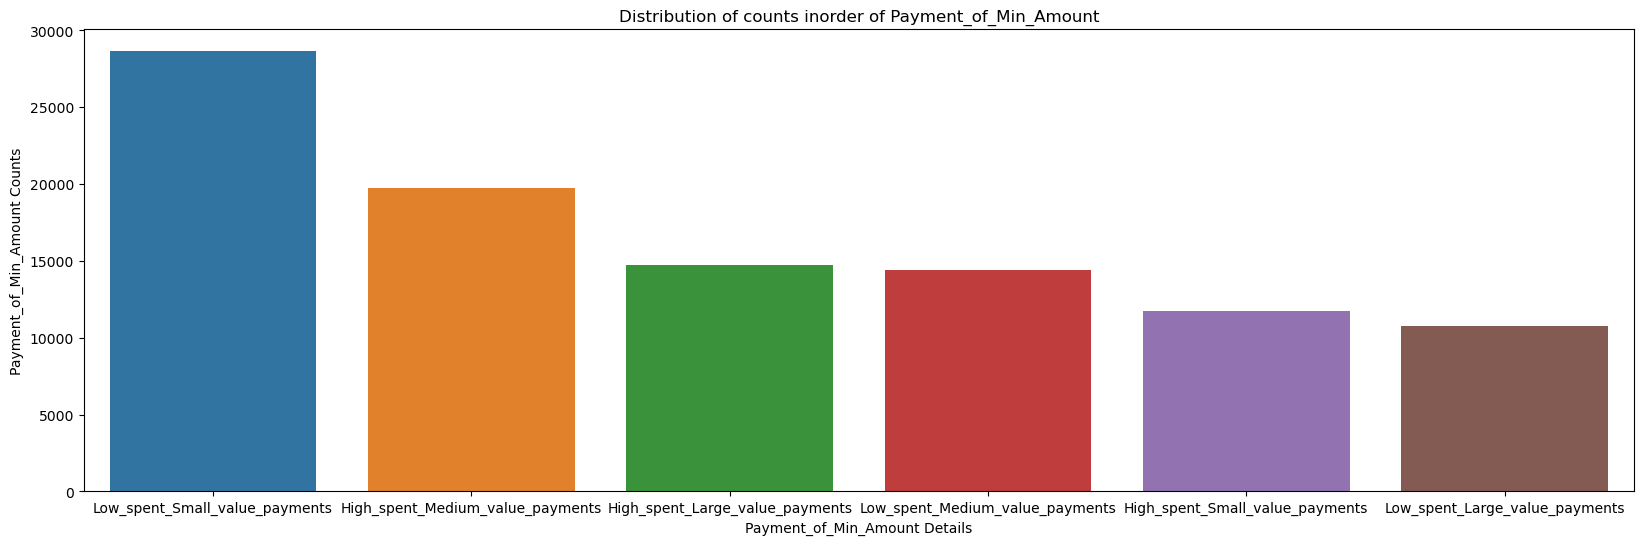

In [16]:
#Payment_Behaviour
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Payment_Behaviour',data=credit_cal,order=credit_data['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

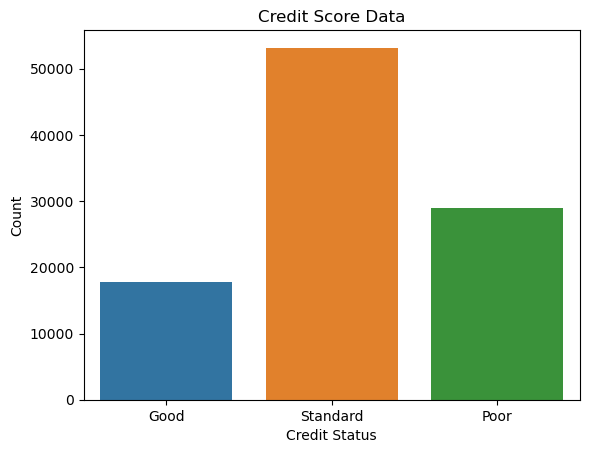

In [17]:
#Credit Score Data
ax = sns.countplot(x = 'Credit_Score',data = credit_data)
plt.title('Credit Score Data')
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.show()

In [18]:
#to get statistics value of credit_num
credit_num.describe().T

count          mean           std          min  \
Age                       100000.0     33.316340     10.764812    14.000000   
Annual_Income             100000.0  50505.123449  38299.422093  7005.930000   
Monthly_Inhand_Salary     100000.0   4197.270835   3186.432497   303.645417   
Num_Bank_Accounts         100000.0      5.368820      2.593314     0.000000   
Num_Credit_Card           100000.0      5.533570      2.067098     0.000000   
Interest_Rate             100000.0     14.532080      8.741330     1.000000   
Num_of_Loan               100000.0      3.532880      2.446356     0.000000   
Delay_from_due_date       100000.0     21.081410     14.804560     0.000000   
Num_of_Delayed_Payment    100000.0     13.313120      6.237166     0.000000   
Changed_Credit_Limit      100000.0     10.470323      6.609481     0.500000   
Num_Credit_Inquiries      100000.0      5.798250      3.867826     0.000000   
Outstanding_Debt          100000.0   1426.220376   1155.129026     0.230000   
Credit_Utilization_Ratio  100000.0     32.285173      5.116875    20.000000   
Total_EMI_per_month       100000.0    107.699208    132.267056     0.000000   
Amount_invested_monthly   100000.0     55.101315     39.006932     0.000000   
Monthly_Balance           100000.0    392.697586    201.652719     0.007760   

                                   25%           50%           75%  \
Age                          24.000000     33.000000     42.000000   
Annual_Income             19342.972500  36999.705000  71683.470000   
Monthly_Inhand_Salary      1626.594167   3095.905000   5957.715000   
Num_Bank_Accounts             3.000000      5.000000      7.000000   
Num_Credit_Card               4.000000      5.000000      7.000000   
Interest_Rate                 7.000000     13.000000     20.000000   
Num_of_Loan                   2.000000      3.000000      5.000000   
Delay_from_due_date          10.000000     18.000000     28.000000   
Num_of_Delayed_Payment        9.000000     14.000000     18.000000   
Changed_Credit_Limit          5.380000      9.400000     14.850000   
Num_Credit_Inquiries          3.000000      5.000000      8.000000   
Outstanding_Debt            566.072500   1166.155000   1945.962500   
Credit_Utilization_Ratio     28.052567     32.305784     36.496663   
Total_EMI_per_month          29.268886     66.462304    147.392573   
Amount_invested_monthly      27.959111     45.156550     71.295797   
Monthly_Balance             267.615983    333.865366    463.215683   

                                    max  
Age                           56.000000  
Annual_Income             179987.280000  
Monthly_Inhand_Salary      15204.633333  
Num_Bank_Accounts             11.000000  
Num_Credit_Card               11.000000  
Interest_Rate                 34.000000  
Num_of_Loan                    9.000000  
Delay_from_due_date           62.000000  
Num_of_Delayed_Payment        25.000000  
Changed_Credit_Limit          29.980000  
Num_Credit_Inquiries          17.000000  
Outstanding_Debt            4998.070000  
Credit_Utilization_Ratio      50.000000  
Total_EMI_per_month         1779.103254  
Amount_invested_monthly      434.191089  
Monthly_Balance             1183.930696

Text(0.5, 0.98, 'Pairplot of Numerical Variables')

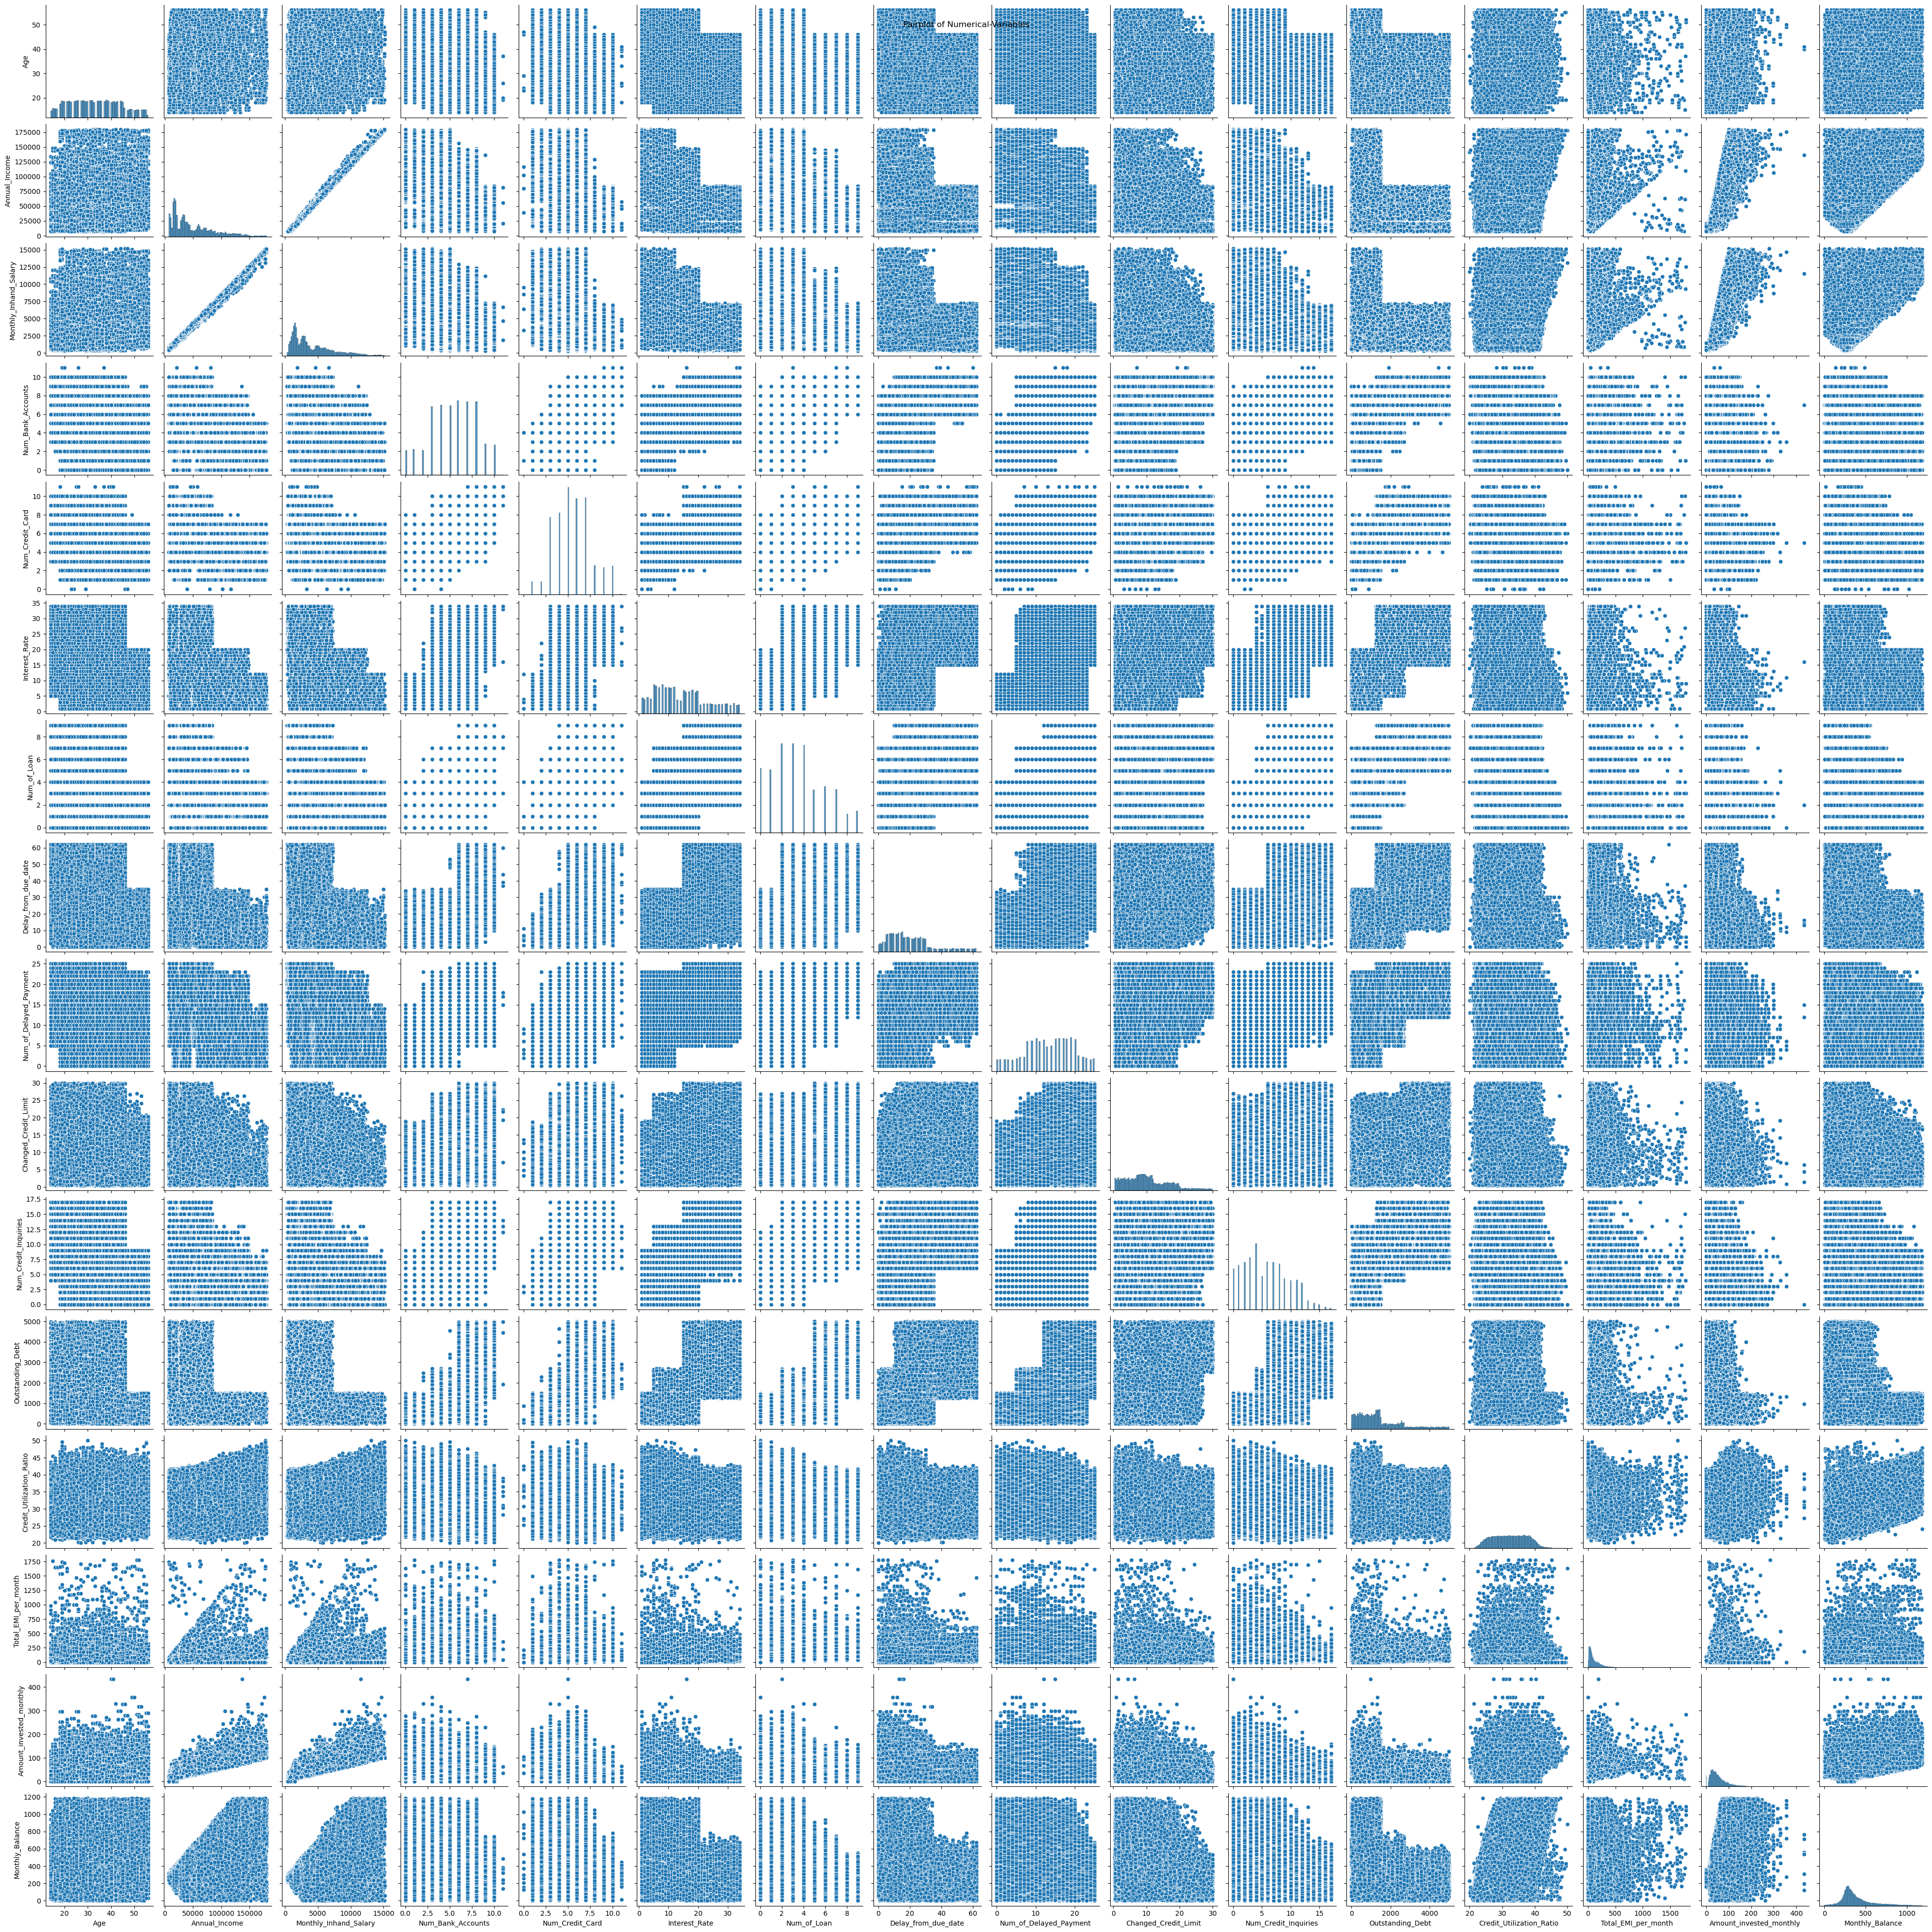

In [19]:
# Pairplot for Numerical Variables
sns.pairplot(credit_num)
plt.suptitle('Pairplot of Numerical Variables')

In [20]:
corr_format= credit_num.corr()
corr_format

Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.091525               0.090636   
Annual_Income             0.091525       1.000000               0.998154   
Monthly_Inhand_Salary     0.090636       0.998154               1.000000   
Num_Bank_Accounts        -0.190415      -0.284060              -0.283181   
Num_Credit_Card          -0.148567      -0.217852              -0.216847   
Interest_Rate            -0.217557      -0.302352              -0.301858   
Num_of_Loan              -0.213533      -0.255560              -0.254298   
Delay_from_due_date      -0.174119      -0.250105              -0.249438   
Num_of_Delayed_Payment   -0.184264      -0.286297              -0.285360   
Changed_Credit_Limit     -0.157254      -0.176353              -0.176187   
Num_Credit_Inquiries     -0.250960      -0.280242              -0.279736   
Outstanding_Debt         -0.202374      -0.269319              -0.269044   
Credit_Utilization_Ratio  0.025492       0.175930               0.176092   
Total_EMI_per_month      -0.047334       0.438106               0.421836   
Amount_invested_monthly   0.071045       0.806281               0.807326   
Monthly_Balance           0.116098       0.625640               0.626631   

                          Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Age                               -0.190415        -0.148567      -0.217557   
Annual_Income                     -0.284060        -0.217852      -0.302352   
Monthly_Inhand_Salary             -0.283181        -0.216847      -0.301858   
Num_Bank_Accounts                  1.000000         0.442694       0.584302   
Num_Credit_Card                    0.442694         1.000000       0.497912   
Interest_Rate                      0.584302         0.497912       1.000000   
Num_of_Loan                        0.472483         0.417960       0.559156   
Delay_from_due_date                0.560193         0.479762       0.589185   
Num_of_Delayed_Payment             0.601842         0.423300       0.571457   
Changed_Credit_Limit               0.333794         0.255495       0.370156   
Num_Credit_Inquiries               0.518323         0.459429       0.632562   
Outstanding_Debt                   0.507063         0.490376       0.629414   
Credit_Utilization_Ratio          -0.071783        -0.055249      -0.075700   
Total_EMI_per_month                0.050035         0.058853       0.071651   
Amount_invested_monthly           -0.227828        -0.174600      -0.242479   
Monthly_Balance                   -0.286709        -0.231913      -0.317919   

                          Num_of_Loan  Delay_from_due_date  \
Age                         -0.213533            -0.174119   
Annual_Income               -0.255560            -0.250105   
Monthly_Inhand_Salary       -0.254298            -0.249438   
Num_Bank_Accounts            0.472483             0.560193   
Num_Credit_Card              0.417960             0.479762   
Interest_Rate                0.559156             0.589185   
Num_of_Loan                  1.000000             0.501599   
Delay_from_due_date          0.501599             1.000000   
Num_of_Delayed_Payment       0.473919             0.541627   
Changed_Credit_Limit         0.374602             0.296571   
Num_Credit_Inquiries         0.565087             0.539919   
Outstanding_Debt             0.638713             0.572206   
Credit_Utilization_Ratio    -0.100469            -0.063823   
Total_EMI_per_month          0.328485             0.078820   
Amount_invested_monthly     -0.214254            -0.201737   
Monthly_Balance             -0.429416            -0.272273   

                          Num_of_Delayed_Payment  Changed_Credit_Limit  \
Age                                    -0.184264             -0.157254   
Annual_Income                          -0.286297             -0.176353   
Monthly_Inhand_Salary                  -0.285360             -0.176187   
Num_Bank_Accounts                       0.6

<Axes: >

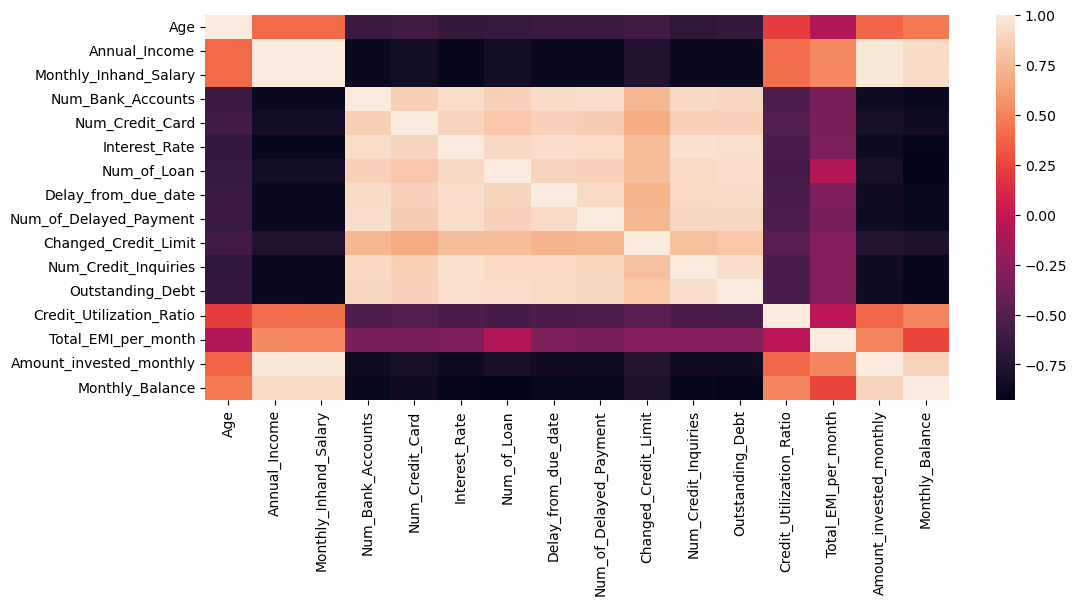

In [21]:
#correlation Analysis
plt.figure(figsize=(12,5))
sns.heatmap(corr_format.corr())

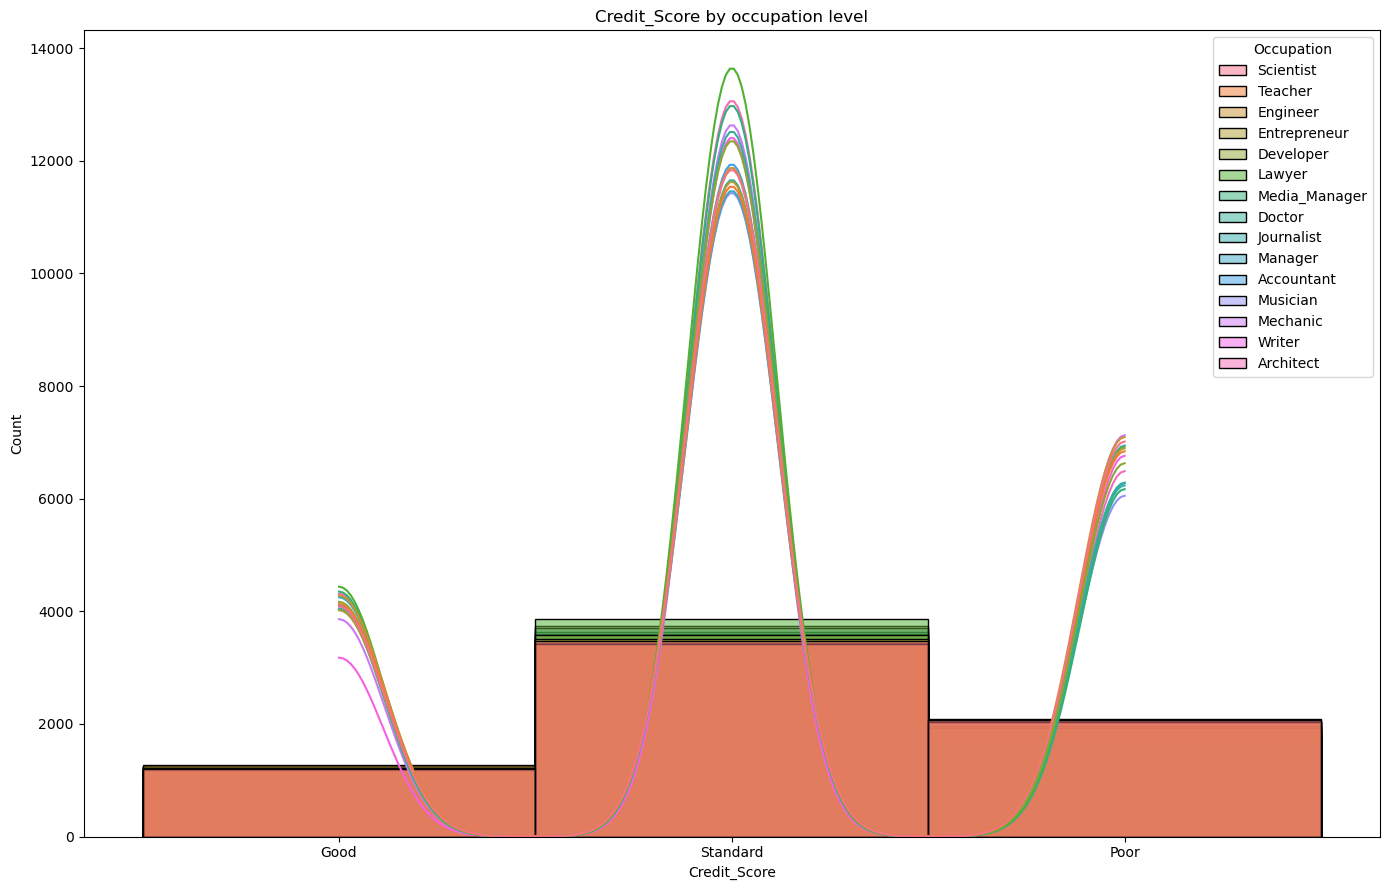

In [22]:
plt.figure(figsize=(14,9))
sns.histplot(hue='Occupation',x='Credit_Score',data=credit_data ,bins=50, kde=True)
plt.title('Credit_Score by occupation level')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Credit_Score by Annual_Income')

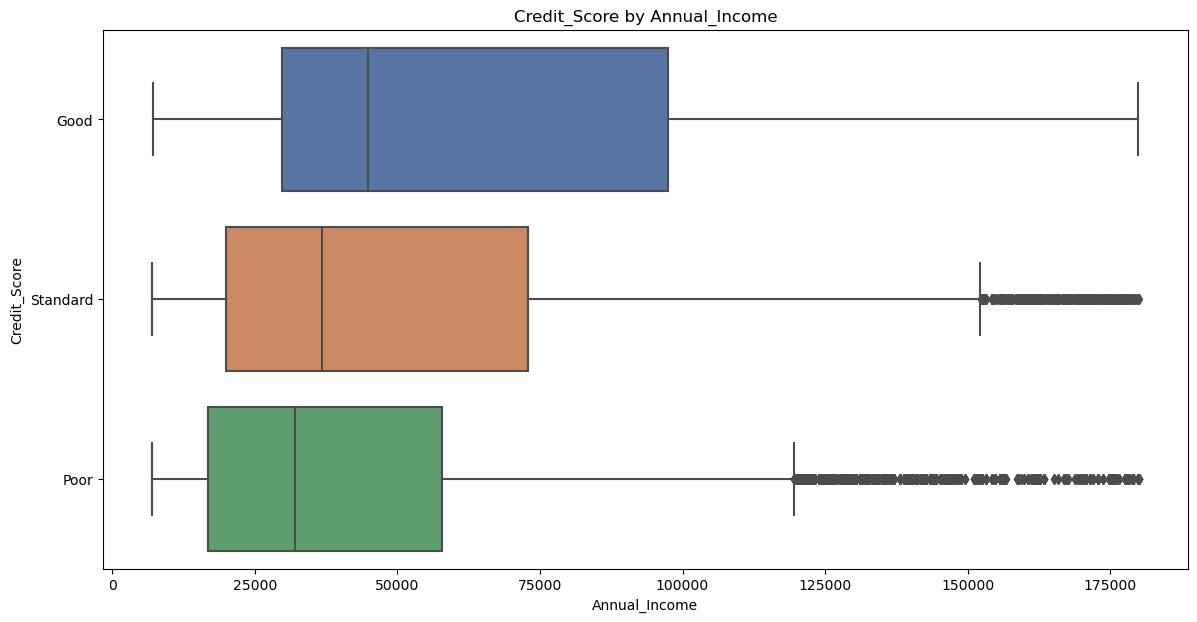

In [23]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Annual_Income',y='Credit_Score',data=credit_data,palette='deep')
plt.title('Credit_Score by Annual_Income')

In [24]:
numeric_cols= credit_data.select_dtypes(exclude='object').columns
cat_cols= credit_data.select_dtypes(include='object').columns
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [25]:
cat_cols

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [26]:
vif_credit_data = credit_data[numeric_cols]
vif_data =pd.DataFrame()
vif_data["Feature"]=vif_credit_data.columns
vif_data["VIF"]=[variance_inflation_factor(vif_credit_data.values,i) for i in range(len(vif_credit_data.columns))]
vif_data.head(17)

Feature         VIF
0                        Age    9.177408
1              Annual_Income  865.994375
2      Monthly_Inhand_Salary  841.999518
3          Num_Bank_Accounts   10.402276
4            Num_Credit_Card   11.857456
5              Interest_Rate    9.100514
6                Num_of_Loan    7.832980
7        Delay_from_due_date    6.005405
8     Num_of_Delayed_Payment   10.466199
9       Changed_Credit_Limit    4.591648
10      Num_Credit_Inquiries    6.818754
11          Outstanding_Debt    6.132270
12  Credit_Utilization_Ratio   21.509381
13       Total_EMI_per_month    3.185388
14   Amount_invested_monthly    8.583202
15           Monthly_Balance    9.184953

# check and drop outliers

In [27]:
df_cleaned = credit_data

In [28]:
df_cleaned.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.316340   50505.123449            4197.270835           5.368820   
std        10.764812   38299.422093            3186.432497           2.593314   
min        14.000000    7005.930000             303.645417           0.000000   
25%        24.000000   19342.972500            1626.594167           3.000000   
50%        33.000000   36999.705000            3095.905000           5.000000   
75%        42.000000   71683.470000            5957.715000           7.000000   
max        56.000000  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       14.53208       3.532880             21.08141   
std           2.067098        8.74133       2.446356             14.80456   
min           0.000000        1.00000       0.000000              0.00000   
25%           4.000000        7.00000       2.000000             10.00000   
50%           5.000000       13.00000       3.000000             18.00000   
75%           7.000000       20.00000       5.000000             28.00000   
max          11.000000       34.00000       9.000000             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count     100000.000000             100000.000000        100000.000000   
mean        1426.220376                 32.285173           107.699208   
std         1155.129026                  5.116875           132.267056   
min            0.230000                 20.000000             0.000000   
25%          566.072500                 28.052567            29.268886   
50%         1166.155000                 32.305784            66.462304   
75%         1945.962500                 36.496663           147.392573   
max         4998.070000                 50.000000          1779.103254   

       Amount_invested_monthly  Monthly_Balance  
count            100000.000000    100000.000000  
mean                 55.101315       392.697586  
std                  39.006932       201.652719  
min                   0.000000         0.007760  
25%                  27.959111       267.615983  
50%                  45.156550       333.865366  
75%                  71.295797       463.215683  
max                 434.191089      1183.930696

In [29]:
# Drop outlier by IQR calculation
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0  Scientist       19114.12            1824.843333   
1      23.0  Scientist       19114.12            1824.843333   
2      23.0  Scientist       19114.12            1824.843333   
3      23.0  Scientist       19114.12            1824.843333   
4      23.0  Scientist       19114.12            1824.843333   
...     ...        ...            ...                    ...   
99995  25.0   Mechanic       39628.99            3359.415833   
99996  25.0   Mechanic       39628.99            3359.415833   
99997  25.0   Mechanic       39628.99            3359.415833   
99998  25.0   Mechanic       39628.99            3359.415833   
99999  25.0   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0            7.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

       Delay_from_due_date  Num_of_Delayed_Payment  ...  Num_Credit_Inquiries  \
0                      3.0                     7.0  ...                   4.0   
1                      3.0                     4.0  ...                   4.0   
2                      3.0                     7.0  ...                   4.0   
3                      5.0                     4.0  ...                   4.0   
4                      6.0                     4.0  ...                   4.0   
...                    ...                     ...  ...                   ...   
99995                 23.0                     7.0  ...                   3.0   
99996                 18.0                     7.0  ...                   3.0   
99997                 27.0                     6.0  ...                   3.0   
99998                 20.0                     6.0  ...                   3.0   
99999                 18.0                     6.0  ...                   3.0   

       Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0            Good           809.98                 26.822620   
1            Good           809.98                 31.944960   
2            Good           809.98                 28.609352   
3            Good           809.98                 31.377862   
4            Good           809.98                 24.797347   
...           ...              ...                       ...   
99995        Good           502.38                 34.663572   
99996        Good           502.38                 40.565631   
99997        Good           502.38                 41.255522   
99998        Good           502.38                 33.638208   
99999        Good           502.38                 34.192463   

       Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                         No           49.574949                21.465380   
1                         No           49.574949                21.465380   
2                         No           49.574949                21.465380   
3                         No           49.574949                21.465380   
4                         No           49.574949                21.465380   
...                      ...                 ...                      ...   
99995                     No           35.104023                24.028477   
9999

<Axes: xlabel='Annual_Income'>

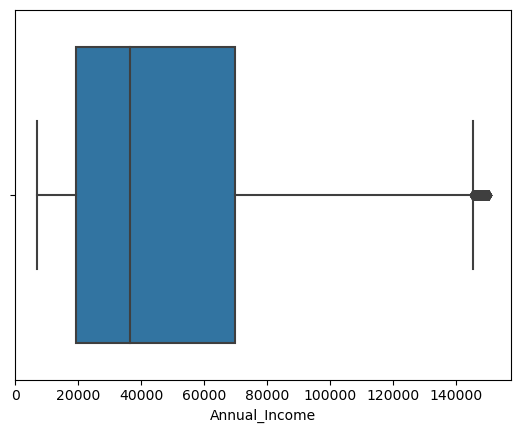

In [30]:
sns.boxplot(x=df_cleaned['Annual_Income'])

<Axes: xlabel='Outstanding_Debt'>

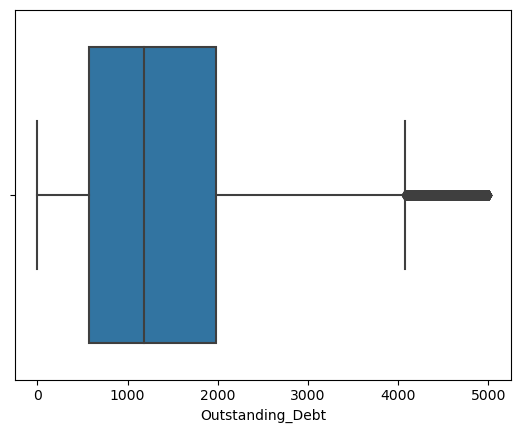

In [31]:
sns.boxplot(x=df_cleaned['Outstanding_Debt'])

# Normalization

In [32]:
df_cleaned

Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0  Scientist       19114.12            1824.843333   
1      23.0  Scientist       19114.12            1824.843333   
2      23.0  Scientist       19114.12            1824.843333   
3      23.0  Scientist       19114.12            1824.843333   
4      23.0  Scientist       19114.12            1824.843333   
...     ...        ...            ...                    ...   
99995  25.0   Mechanic       39628.99            3359.415833   
99996  25.0   Mechanic       39628.99            3359.415833   
99997  25.0   Mechanic       39628.99            3359.415833   
99998  25.0   Mechanic       39628.99            3359.415833   
99999  25.0   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0            7.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

       Delay_from_due_date  Num_of_Delayed_Payment  ...  Num_Credit_Inquiries  \
0                      3.0                     7.0  ...                   4.0   
1                      3.0                     4.0  ...                   4.0   
2                      3.0                     7.0  ...                   4.0   
3                      5.0                     4.0  ...                   4.0   
4                      6.0                     4.0  ...                   4.0   
...                    ...                     ...  ...                   ...   
99995                 23.0                     7.0  ...                   3.0   
99996                 18.0                     7.0  ...                   3.0   
99997                 27.0                     6.0  ...                   3.0   
99998                 20.0                     6.0  ...                   3.0   
99999                 18.0                     6.0  ...                   3.0   

       Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0            Good           809.98                 26.822620   
1            Good           809.98                 31.944960   
2            Good           809.98                 28.609352   
3            Good           809.98                 31.377862   
4            Good           809.98                 24.797347   
...           ...              ...                       ...   
99995        Good           502.38                 34.663572   
99996        Good           502.38                 40.565631   
99997        Good           502.38                 41.255522   
99998        Good           502.38                 33.638208   
99999        Good           502.38                 34.192463   

       Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                         No           49.574949                21.465380   
1                         No           49.574949                21.465380   
2                         No           49.574949                21.465380   
3                         No           49.574949                21.465380   
4                         No           49.574949                21.465380   
...                      ...                 ...                      ...   
99995                     No           35.104023                24.028477   
9999

In [33]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit',
             'Outstanding_Debt','Amount_invested_monthly','Total_EMI_per_month','Interest_Rate']
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned

Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      0.214286  Scientist       0.084598            1824.843333   
1      0.214286  Scientist       0.084598            1824.843333   
2      0.214286  Scientist       0.084598            1824.843333   
3      0.214286  Scientist       0.084598            1824.843333   
4      0.214286  Scientist       0.084598            1824.843333   
...         ...        ...            ...                    ...   
99995  0.261905   Mechanic       0.227933            3359.415833   
99996  0.261905   Mechanic       0.227933            3359.415833   
99997  0.261905   Mechanic       0.227933            3359.415833   
99998  0.261905   Mechanic       0.227933            3359.415833   
99999  0.261905   Mechanic       0.227933            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0       0.060606          4.0   
1                    3.0              4.0       0.060606          4.0   
2                    3.0              4.0       0.060606          4.0   
3                    3.0              4.0       0.060606          4.0   
4                    3.0              4.0       0.060606          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0       0.181818          2.0   
99996                4.0              6.0       0.181818          2.0   
99997                4.0              6.0       0.181818          2.0   
99998                4.0              6.0       0.181818          2.0   
99999                4.0              6.0       0.181818          2.0   

       Delay_from_due_date  Num_of_Delayed_Payment  ...  Num_Credit_Inquiries  \
0                 0.048387                    0.28  ...                   4.0   
1                 0.048387                    0.16  ...                   4.0   
2                 0.048387                    0.28  ...                   4.0   
3                 0.080645                    0.16  ...                   4.0   
4                 0.096774                    0.16  ...                   4.0   
...                    ...                     ...  ...                   ...   
99995             0.370968                    0.28  ...                   3.0   
99996             0.290323                    0.28  ...                   3.0   
99997             0.435484                    0.24  ...                   3.0   
99998             0.322581                    0.24  ...                   3.0   
99999             0.290323                    0.24  ...                   3.0   

       Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0            Good         0.162020                 26.822620   
1            Good         0.162020                 31.944960   
2            Good         0.162020                 28.609352   
3            Good         0.162020                 31.377862   
4            Good         0.162020                 24.797347   
...           ...              ...                       ...   
99995        Good         0.100473                 34.663572   
99996        Good         0.100473                 40.565631   
99997        Good         0.100473                 41.255522   
99998        Good         0.100473                 33.638208   
99999        Good         0.100473                 34.192463   

       Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                         No            0.027930                 0.049438   
1                         No            0.027930                 0.049438   
2                         No            0.027930                 0.049438   
3                         No            0.027930                 0.049438   
4                         No            0.027930                 0.049438   
...                      ...                 ...                      ...   
99995                     No         

# Encoding

In [34]:
df_cleaned.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [35]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  0.214286       0.084598            1824.843333                3.0   
1  0.214286       0.084598            1824.843333                3.0   
2  0.214286       0.084598            1824.843333                3.0   
3  0.214286       0.084598            1824.843333                3.0   
4  0.214286       0.084598            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0       0.060606          4.0             0.048387   
1              4.0       0.060606          4.0             0.048387   
2              4.0       0.060606          4.0             0.048387   
3              4.0       0.060606          4.0             0.080645   
4              4.0       0.060606          4.0             0.096774   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Occupation_Entrepreneur  \
0                    0.28              0.365332  ...                        0   
1                    0.16              0.365332  ...                        0   
2                    0.28              0.365332  ...                        0   
3                    0.16              0.195726  ...                        0   
4                    0.16              0.365332  ...                        0   

  Occupation_Journalist  Occupation_Lawyer  Occupation_Manager  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   0   
3                     0                  0                   0   
4                     0                  0                   0   

  Occupation_Mechanic  Occupation_Media_Manager  Occupation_Musician  \
0                   0                         0                    0   
1                   0                         0                    0   
2                   0                         0                    0   
3                   0                         0                    0   
4                   0                         0                    0   

  Occupation_Scientist  Occupation_Teacher Occupation_Writer  
0                    1                   0                 0  
1                    1                   0                 0  
2                    1                   0                 0  
3                    1                   0                 0  
4                    1                   0                 0  

[5 rows x 35 columns]

In [36]:
data = df_cleaned[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment','Outstanding_Debt', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour','Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer','Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher','Occupation_Writer']]


# Splitting data

In [37]:
df_train_x = data.drop('Credit_Score',axis = 1)
df_train_y = data['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)